In [1]:
%autosave 100000

Autosaving every 100000 seconds


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [3]:
tr_data = pd.read_csv('../input/train.csv')
te_data = pd.read_csv('../input/test.csv')
print('train shape: {}'.format(tr_data.shape))
print('test shape: {}'.format(te_data.shape))
print('train data head:')
tr_data.head()


train shape: (42000, 785)
test shape: (28000, 784)
train data head:


label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  
3         0         0         0         0         0  
4         0         0         0         0         0  

[5 rows x 785 columns]

In [4]:
X_train = tr_data.iloc[:,1:].values.astype('float32') # all pixel values
y_train = tr_data.iloc[:,0].values.astype('int32') # only labels i.e targets digits
X_test = te_data.values.astype('float32')

In [5]:
X_train /= 255
X_test /= 255

In [6]:
from keras.utils.np_utils import to_categorical
OHE_y_train = to_categorical(y_train)
num_classes = OHE_y_train.shape[1]
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)

In [ ]:
import os
def save_model(model):
    # this is a helper function used to save a keras NN model architecture and weights
    json_string = model.to_json()
    if not os.path.isdir('cache'):
        os.mkdir('cache')
    open(os.path.join('cache', 'architecture.json'), 'w').write(json_string)
    model.save_weights(os.path.join('cache', 'model_weights.h5'), overwrite=True)
    
def read_model():
    # this is a helper function used to restore a keras NN model architecture and weights
    model = model_from_json(open(os.path.join('cache', 'architecture.json')).read())
    model.load_weights(os.path.join('cache', 'model_weights.h5'))
    return model

In [7]:
if load_saved_model:
    model=read_model()
else:
    from keras.layers import Conv2D,MaxPool2D
    from keras.layers.pooling import MaxPooling2D

    model = Sequential()
    model.add(Conv2D(32,(5,5),activation='relu',input_shape=(28,28,1)))
    model.add(Conv2D(32,(5,5),activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2),padding='valid'))
    model.add(Conv2D(32,(3,3),activation='relu'))
    model.add(Conv2D(32,(3,3),activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2),padding='valid'))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(10, activation='softmax'))

    #model.summary()

    sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

    hist = model.fit(X_train,OHE_y_train,validation_split=0.1,shuffle=True,verbose=2,epochs=20)
    save_model(model)

Train on 37800 samples, validate on 4200 samples
Epoch 1/20
13s - loss: 0.9631 - acc: 0.6738 - val_loss: 0.2352 - val_acc: 0.9281
Epoch 2/20
10s - loss: 0.2229 - acc: 0.9311 - val_loss: 0.1730 - val_acc: 0.9457
Epoch 3/20
10s - loss: 0.1623 - acc: 0.9503 - val_loss: 0.0956 - val_acc: 0.9695
Epoch 4/20
10s - loss: 0.1333 - acc: 0.9585 - val_loss: 0.0927 - val_acc: 0.9714
Epoch 5/20
10s - loss: 0.1112 - acc: 0.9651 - val_loss: 0.0766 - val_acc: 0.9760
Epoch 6/20
10s - loss: 0.0994 - acc: 0.9688 - val_loss: 0.0863 - val_acc: 0.9767
Epoch 7/20
10s - loss: 0.0876 - acc: 0.9740 - val_loss: 0.0807 - val_acc: 0.9748
Epoch 8/20
10s - loss: 0.0830 - acc: 0.9732 - val_loss: 0.0666 - val_acc: 0.9788
Epoch 9/20
10s - loss: 0.0756 - acc: 0.9760 - val_loss: 0.0538 - val_acc: 0.9817
Epoch 10/20
10s - loss: 0.0697 - acc: 0.9780 - val_loss: 0.0515 - val_acc: 0.9831
Epoch 11/20
10s - loss: 0.0650 - acc: 0.9793 - val_loss: 0.0508 - val_acc: 0.9843
Epoch 12/20
10s - loss: 0.0599 - acc: 0.9805 - val_loss: 0

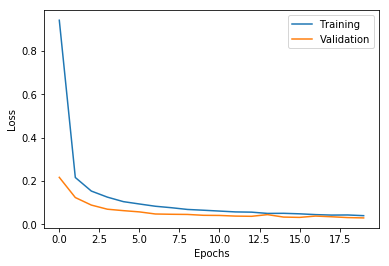

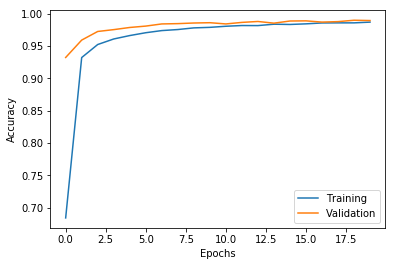

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='lower right')

1/1 [==============================] - 0s

/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "



the prediction is [0] 


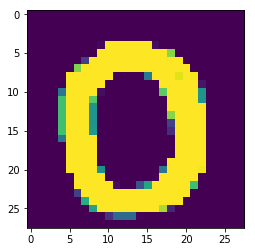

In [10]:
from PIL import Image
from skimage import io
from skimage.transform import resize
img = io.imread('../input/my0.png', as_grey=True)
img = 1-img
img /= np.max(np.max(img))
img_resized = resize(img,(28,28))
plt.imshow(img_resized)
img_reshaped = np.array(img_resized).reshape(1,28,28,1)
print('the prediction is {} '.format(model.predict_classes(img_reshaped)))

In [11]:

def autocrop(image, threshold=0):
    """Crops any edges below or equal to threshold
    Crops blank image to 1x1.
    Returns cropped image.
    """
    if len(image.shape) == 3:
        flatImage = np.max(image, 2)
    else:
        flatImage = image
    assert len(flatImage.shape) == 2

    rows = np.where(np.max(flatImage, 0) > threshold)[0]
    if rows.size:
        cols = np.where(np.max(flatImage, 1) > threshold)[0]
        image = image[cols[0]: cols[-1] + 1, rows[0]: rows[-1] + 1]
    else:
        image = image[:1, :1]

    return image

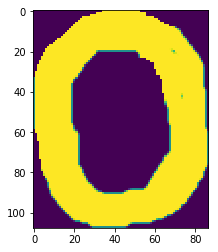

In [12]:
img = autocrop(img, 0.2)
plt.imshow(img)

In [13]:
resize_ratio = max(img.shape)/min(img.shape)
print(resize_ratio)
shp = img.shape

1.2413793103448276


/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


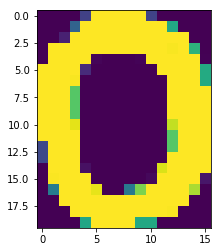

In [14]:
if shp[0] > shp[1]:
    img = resize(img, (20,np.round(20/resize_ratio)))
else:
    img = resize(img, (np.round(20/resize_ratio),20))
                 
plt.imshow(img)

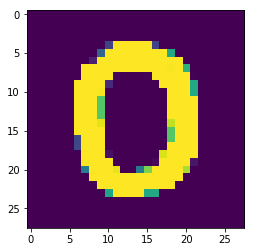

In [15]:
img0 = np.zeros((28,28))
st0 = np.int(np.floor((28-img.shape[0])/2))
st1 = np.int(np.floor((28-img.shape[1])/2))
img0[st0:st0+img.shape[0],st1:st1+img.shape[1]] = img
plt.imshow(img0)

In [16]:
img0_reshaped = np.array(img0).reshape(1,28,28,1)
print('the prediction is {} '.format(model.predict_classes(img0_reshaped)))

1/1 [==============================] - 0s
the prediction is [0] 
